<a href="https://colab.research.google.com/github/vedant0611/Anubhuti-IIIT-D-Fellowship/blob/main/Causality_Autism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install torch_geometric

In [35]:
!pip install dowhy

In [36]:
!pip install cdt networkx matplotlib pandas

In [37]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 11.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [38]:
import pandas as pd

import numpy as np

from cdt.causality.graph import PC

import networkx as nx
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import spacy
from scipy.stats import pearsonr

In [39]:
df = pd.read_csv("/content/autism_spectrum_case_sheets_2500_with_age.csv")
df.drop("Name",axis=1,inplace=True)
df.drop("Contact Information",axis=1,inplace=True)
df.drop("Date of Assessment",axis=1,inplace=True)

df

,Age,Gender,Delayed speech and language development,Difficulty in social interactions,Repetitive behaviors and routines,Sensitivity to sensory stimuli,Birth History,Birth weight (kg),Complications during pregnancy or delivery,Rolled over at (months),...,Motor Function,Sensory Function,Coordination,Difficulty with back-and-forth conversation,Shows intense interest in specific topics,Engages in repetitive movements and rituals,Hearing Test,Genetic Testing,Neuroimaging (MRI),Autism
0,5,Male,False,True,False,True,"Full-term, cesarean delivery",3.1,Yes,3,...,Normal tone and strength,Overreactive to tactile stimuli,Appropriate for age,True,False,True,Normal,Negative for Fragile X Syndrome and other comm...,No structural abnormalities,True
1,8,Female,False,True,True,True,"Full-term, cesarean delivery",2.7,No,4,...,Normal tone and strength,Overreactive to tactile stimuli,"Appropriate for age, some clumsiness noted",True,True,False,Normal,Negative for Fragile X Syndrome and other comm...,No structural abnormalities,True
2,9,Female,False,True,False,False,"Full-term, cesarean delivery",3.4,Yes,5,...,Normal tone and strength,Normal,Appropriate for age,False,False,True,Normal,Negative for Fragile X Syndrome and other comm...,No structural abnormalities,True
3,8,Female,True,False,True,True,"Preterm, normal vaginal delivery",3.6,Yes,6,...,Normal tone and strength,Normal,"Appropriate for age, some clumsiness noted",False,True,False,Normal,Negative for Fragile X Syndrome and other comm...,No structural abnormalities,False
4,5,Male,True,False,False,True,"Full-term, cesarean delivery",2.6,Yes,3,...,Normal tone and strength,Normal,Appropriate for age,True,False,True,Normal,Negative for Fragile X Syndrome and other comm...,No structural abnormalities,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,3,Male,False,True,True,False,"Preterm, normal vaginal delivery",4.3,Yes,6,...,Normal tone and strength,Overreactive to tactile stimuli,"Appropriate for age, some clumsiness noted",False,False,True,Normal,Negative for Fragile X Syndrome and other comm...,No structural abnormalities,True
2496,10,Male,True,False,False,True,"Full-term, normal vaginal delivery",2.8,No,3,...,Normal tone and strength,Normal,"Appropriate for age, some clumsiness noted",True,True,False,Normal,Negative for Fragile X Syndrome and other comm...,No structural abnormalities,False
2497,4,Male,False,True,False,True,"Full-term, cesarean delivery",3.9,Yes,4,...,Normal tone and strength,Overreactive to tactile stimuli,"Appropriate for age, some clumsiness noted",True,False,False,Normal,Negative for Fragile X Syndrome and other comm...,No structural abnormalities,False
2498,4,Female,False,False,False,True,"Full-term, normal vaginal delivery",2.6,No,5,...,Normal tone and strength,Overreactive to tactile stimuli,"Appropriate for age, some clumsiness noted",True,False,True,Normal,Negative for Fragile X Syndrome and other comm...,No structural abnormalities,False


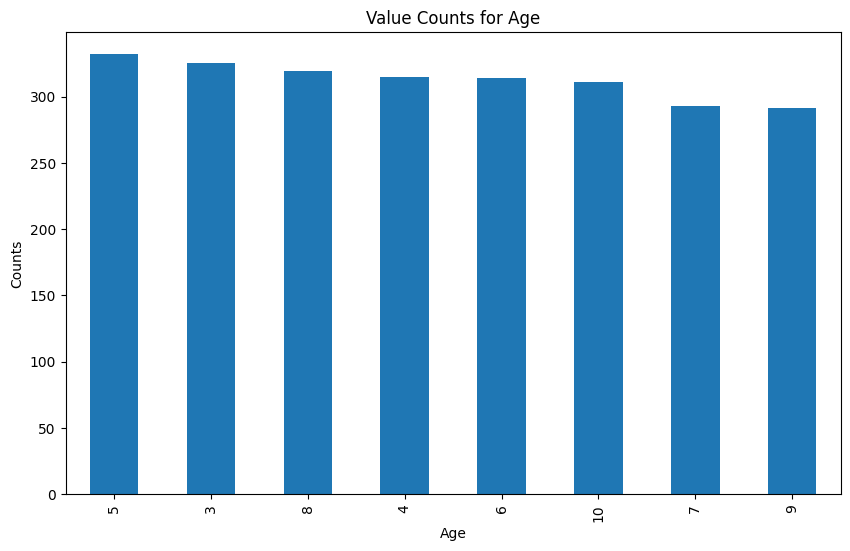

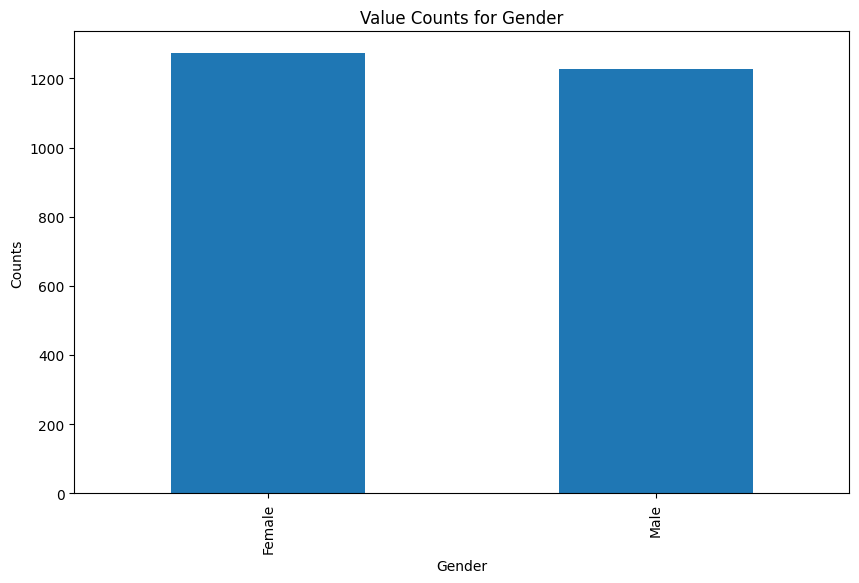

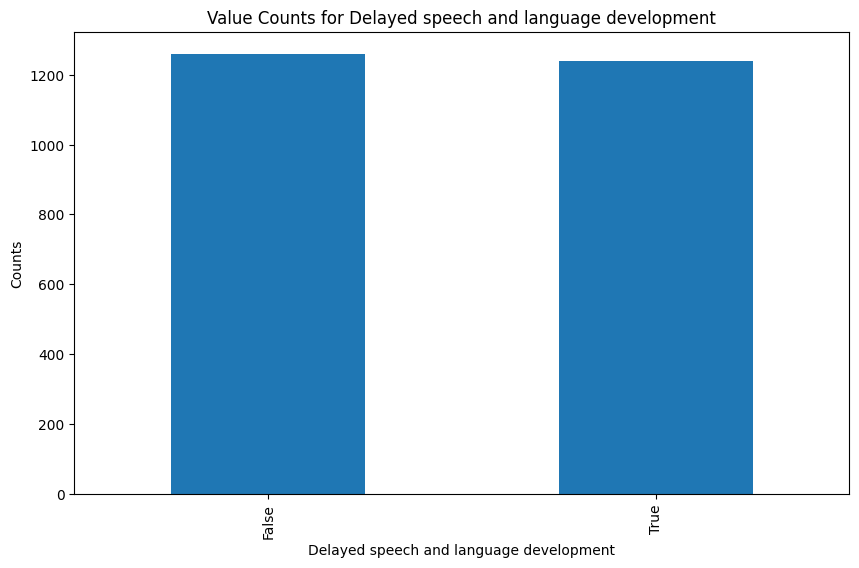

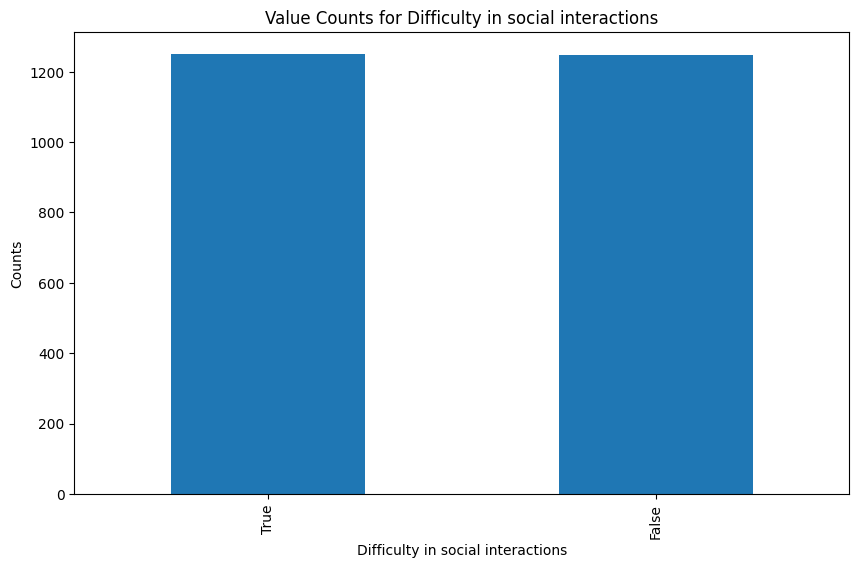

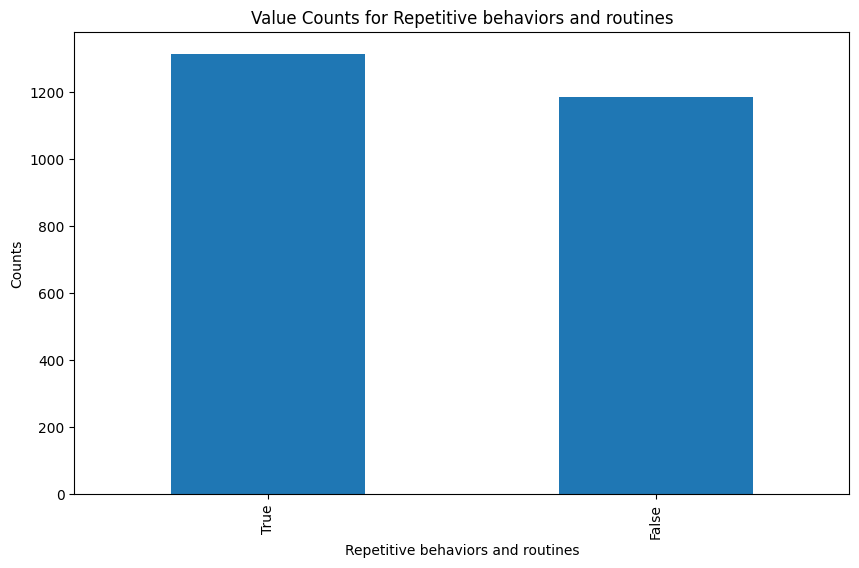

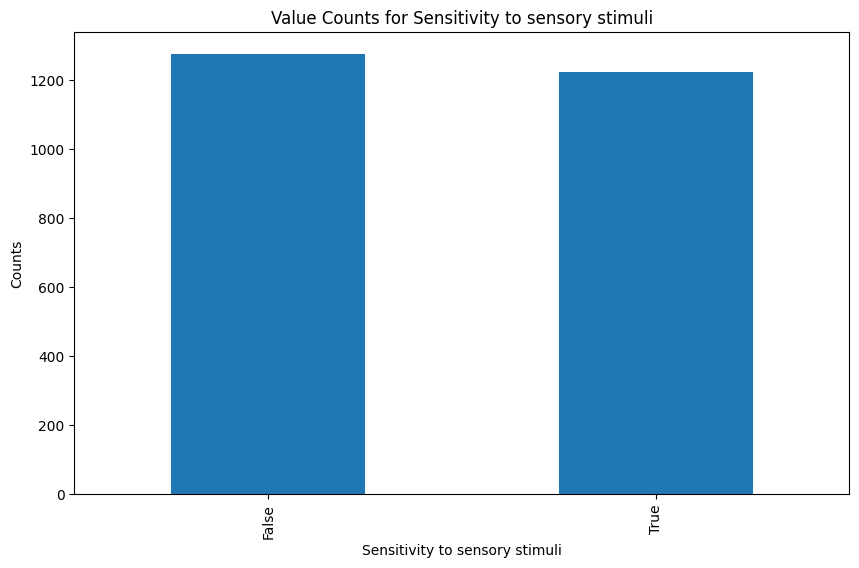

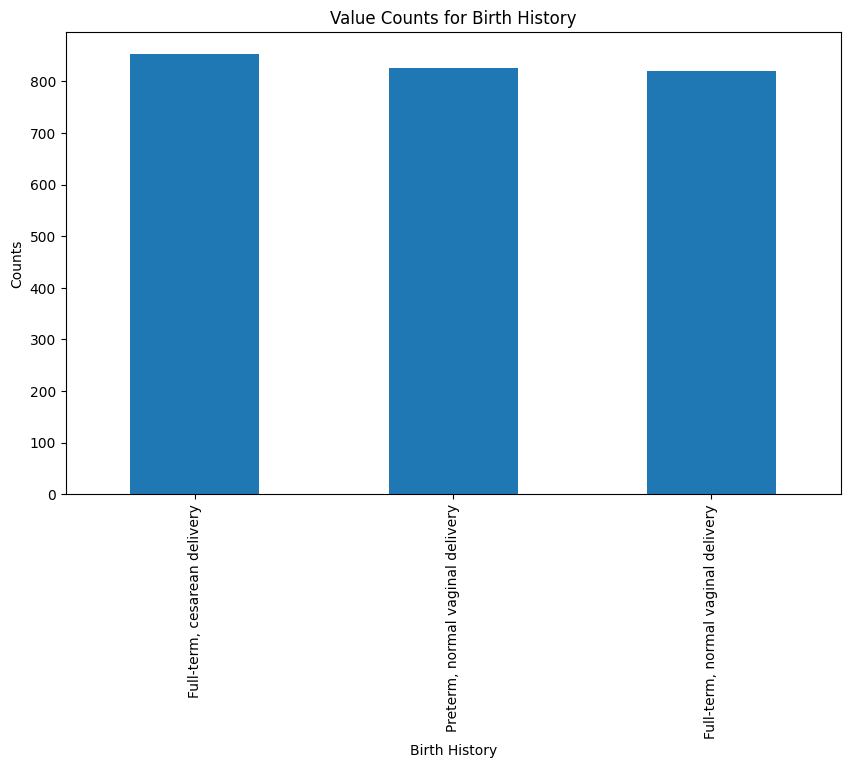

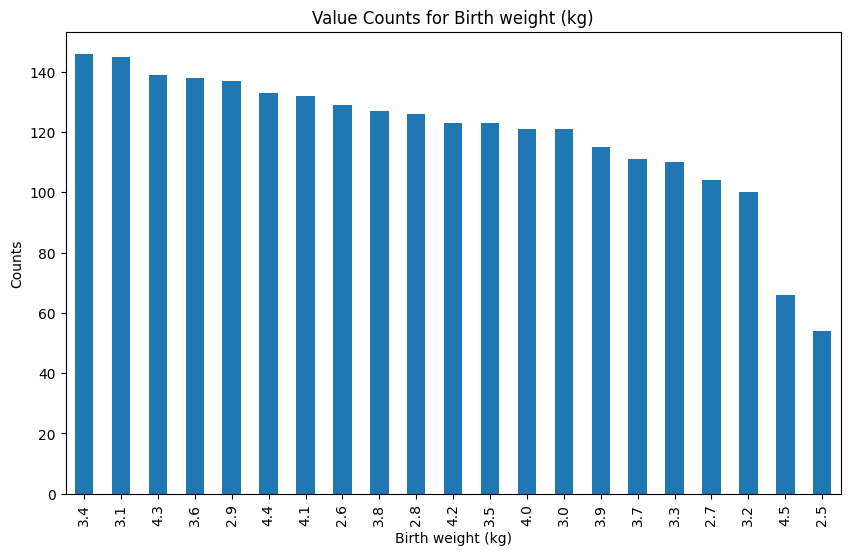

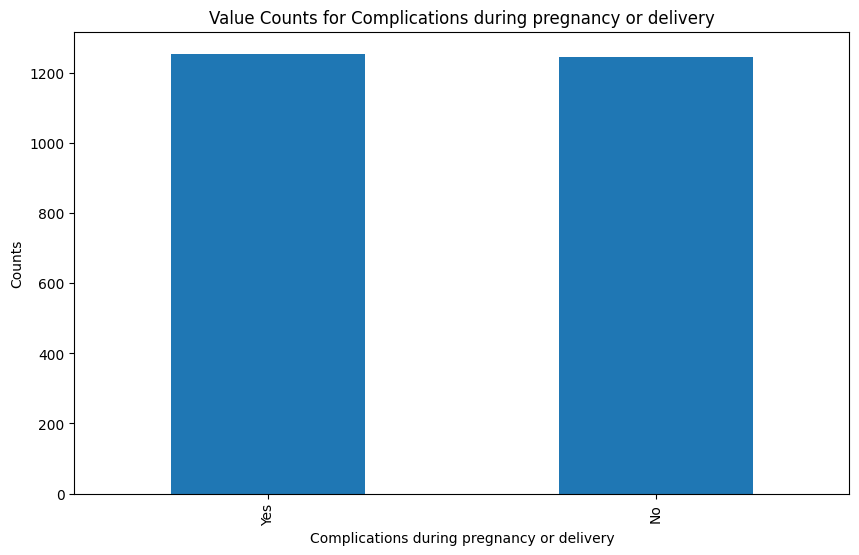

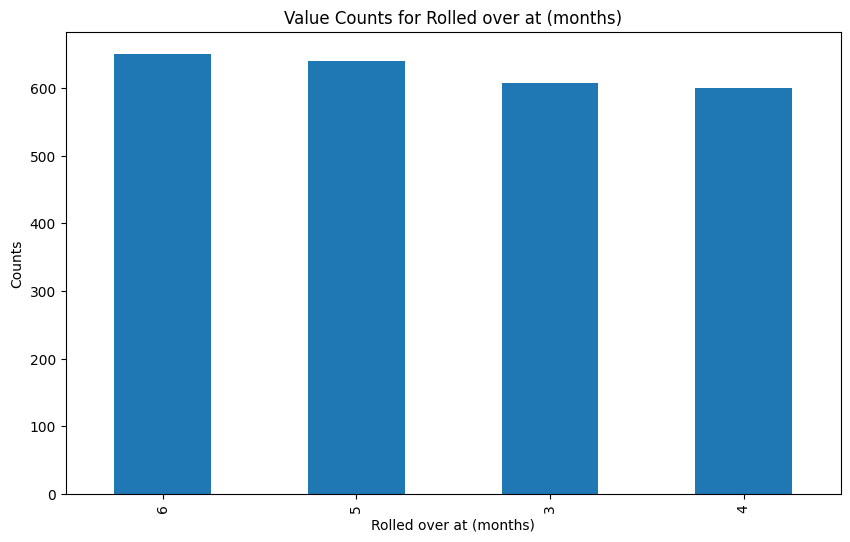

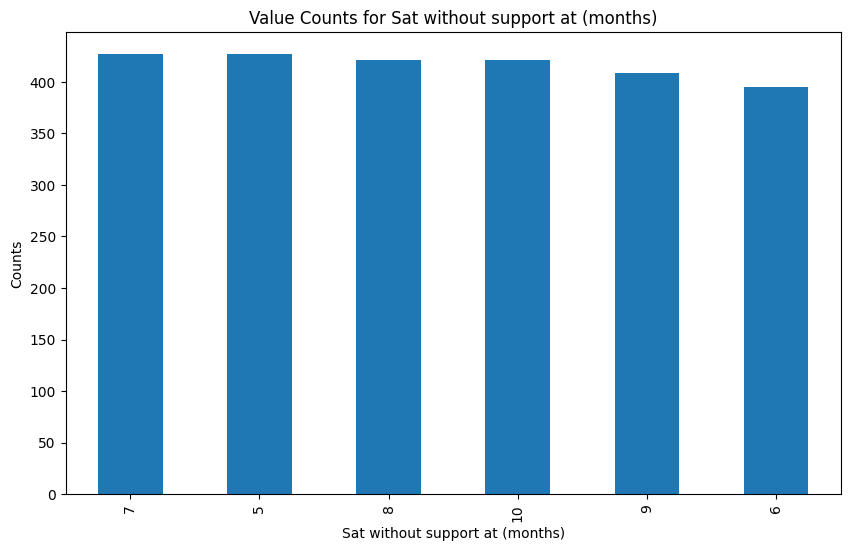

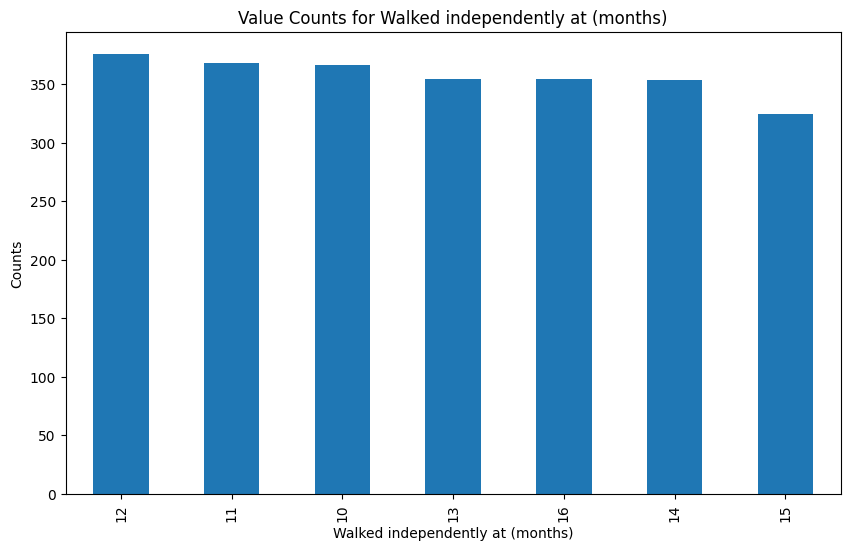

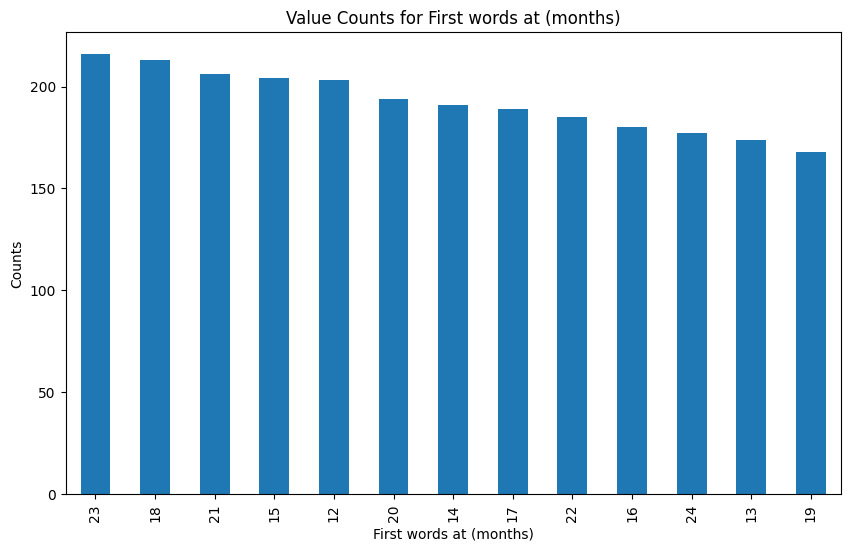

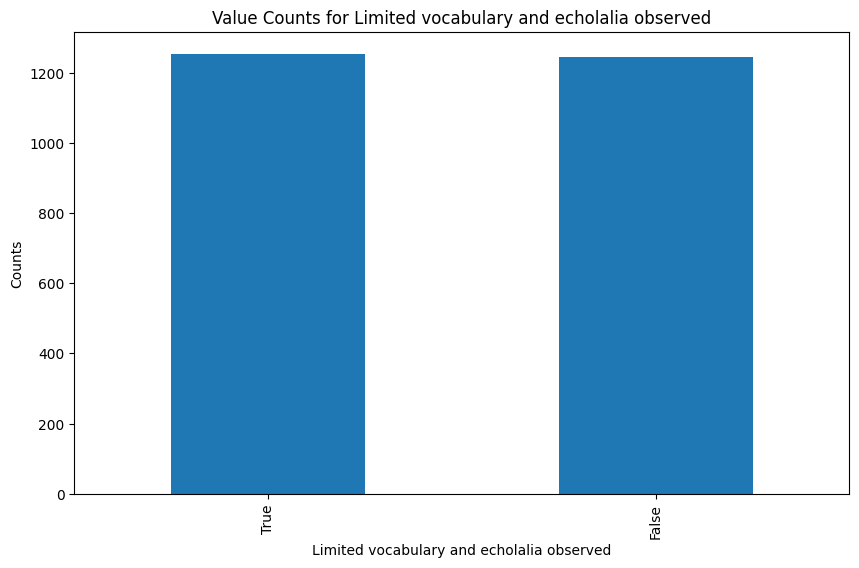

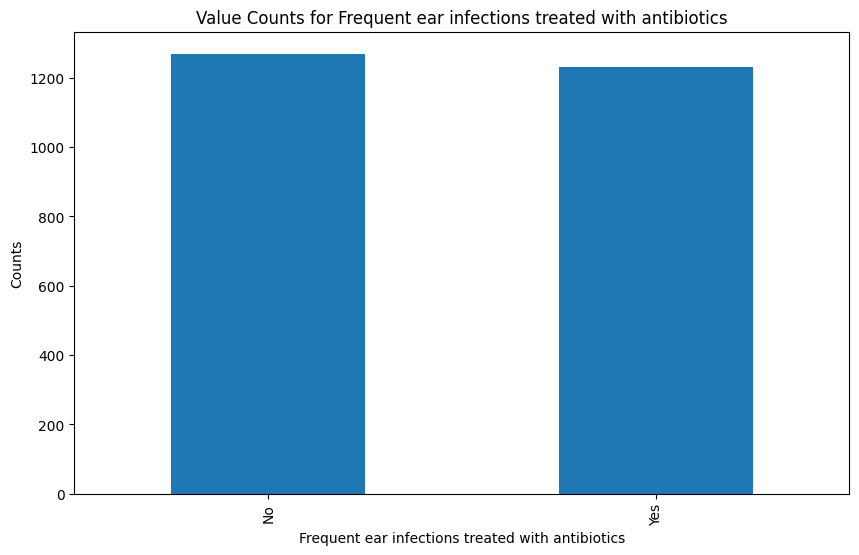

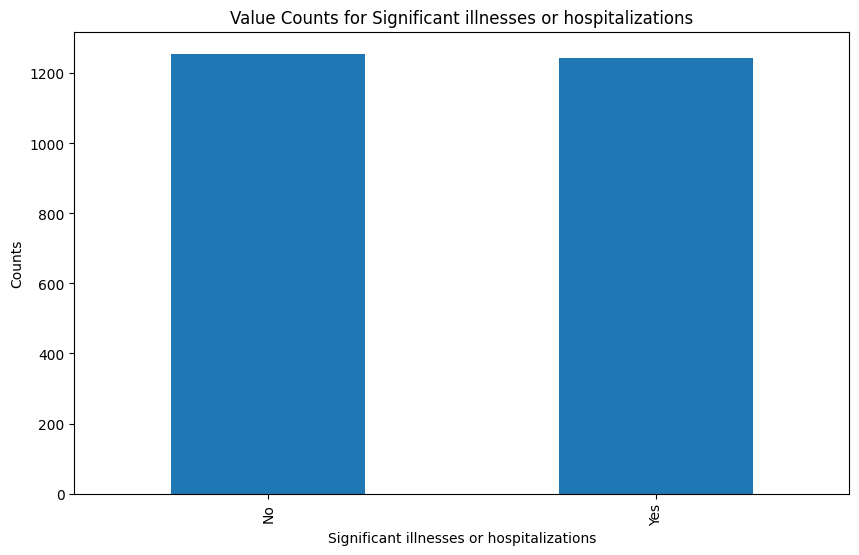

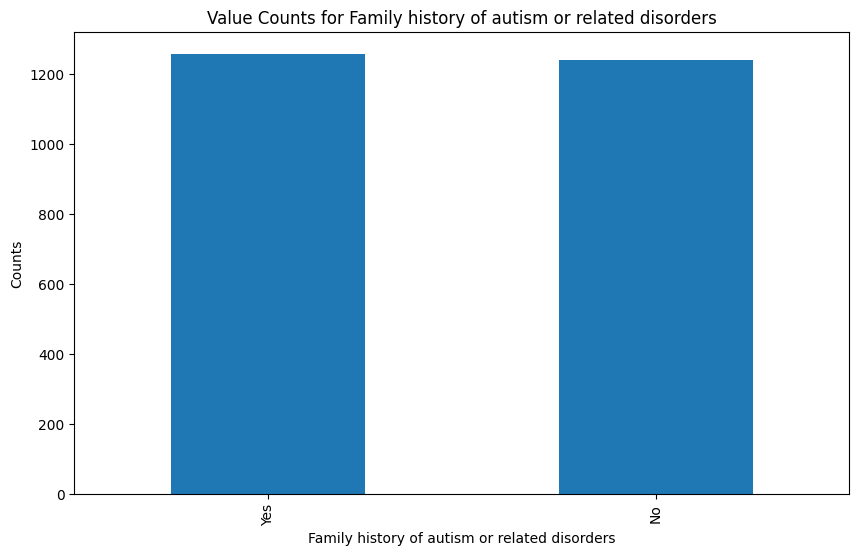

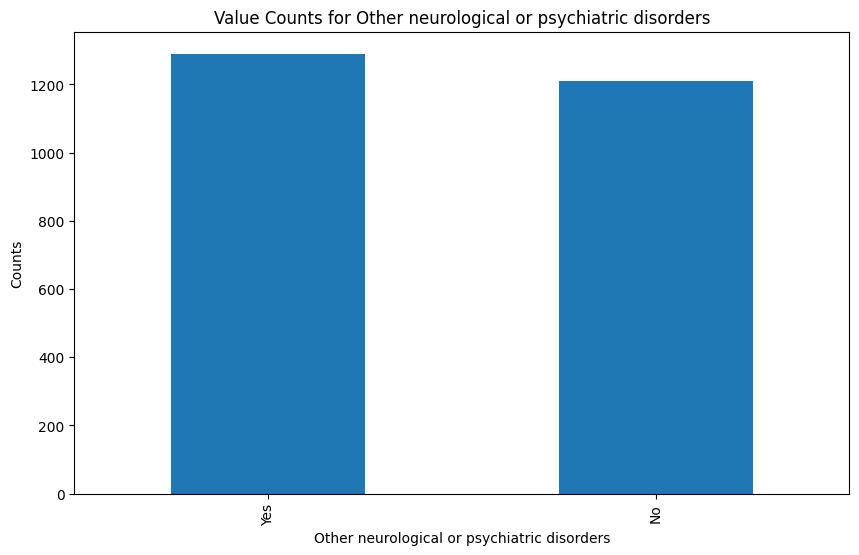

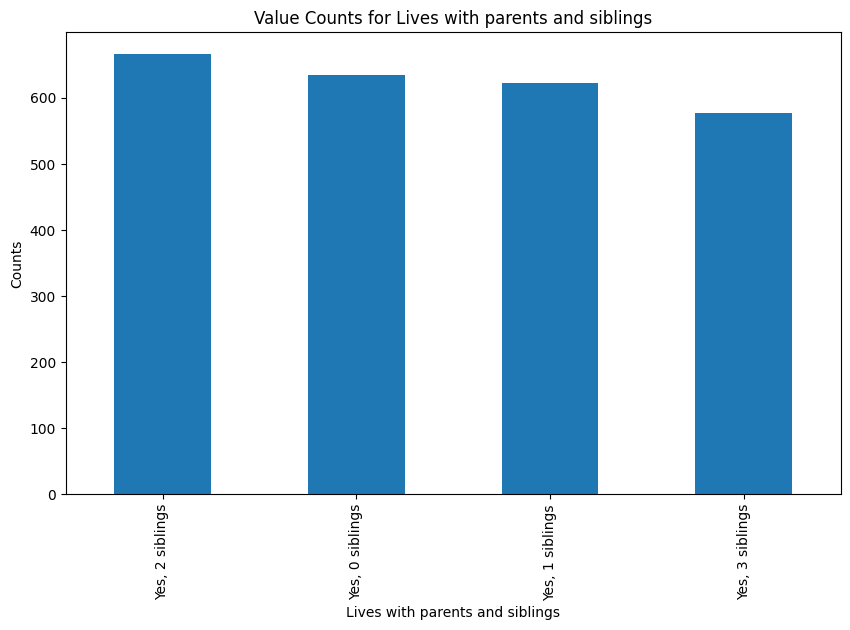

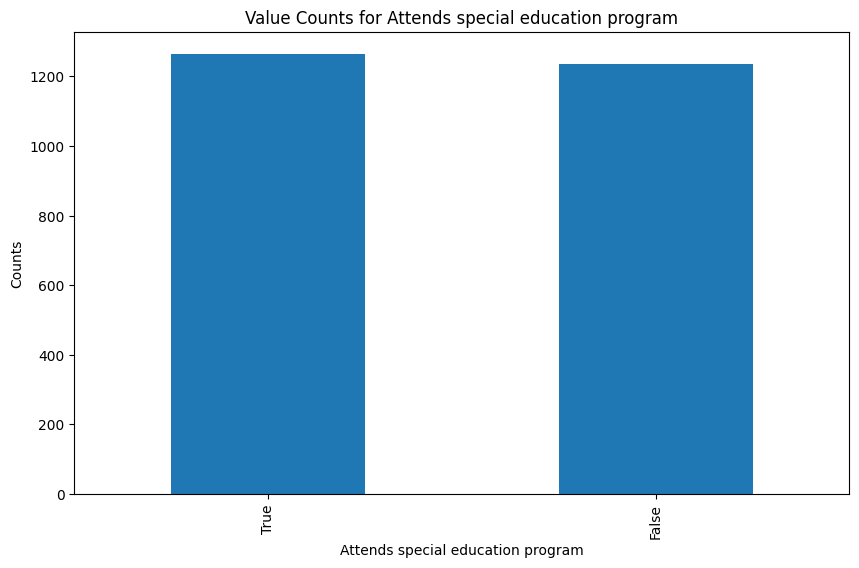

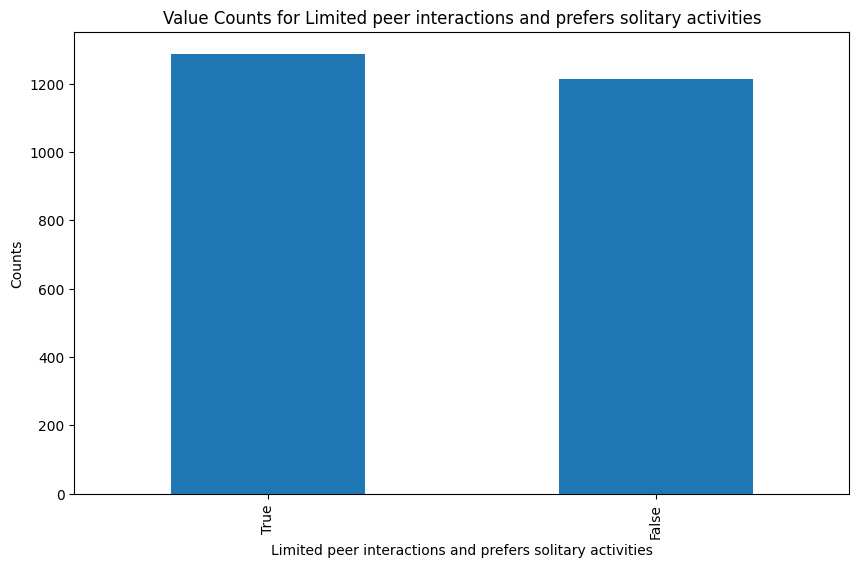

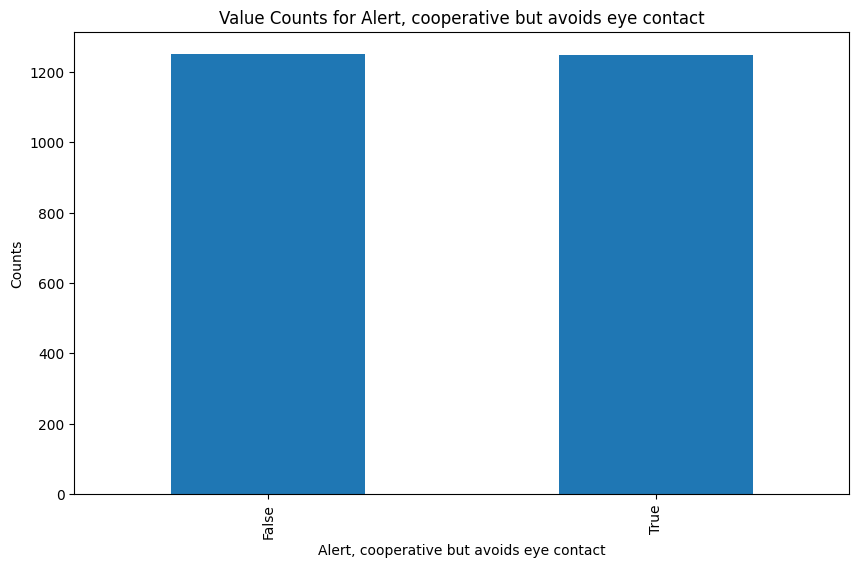

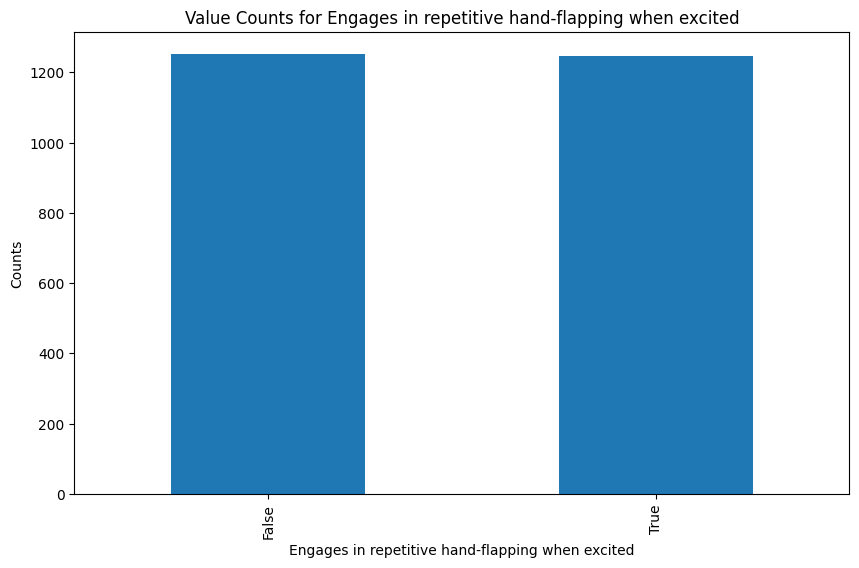

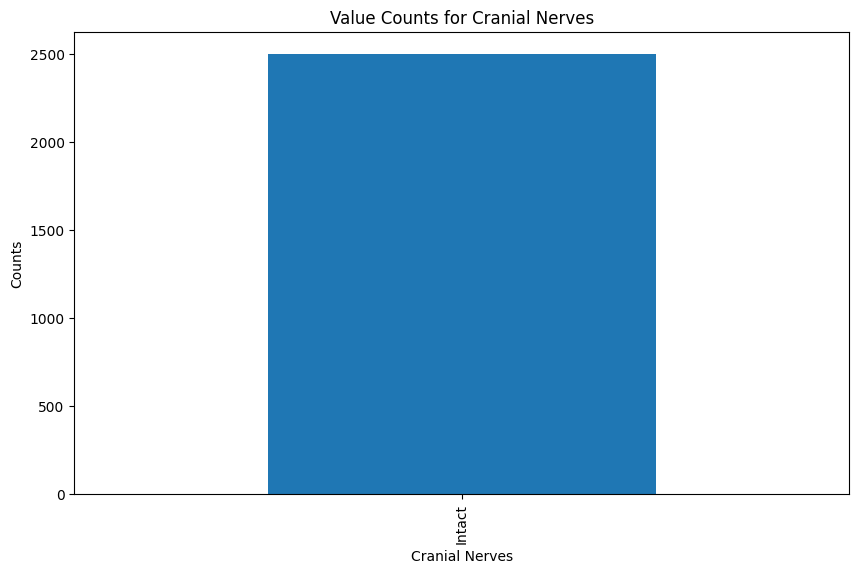

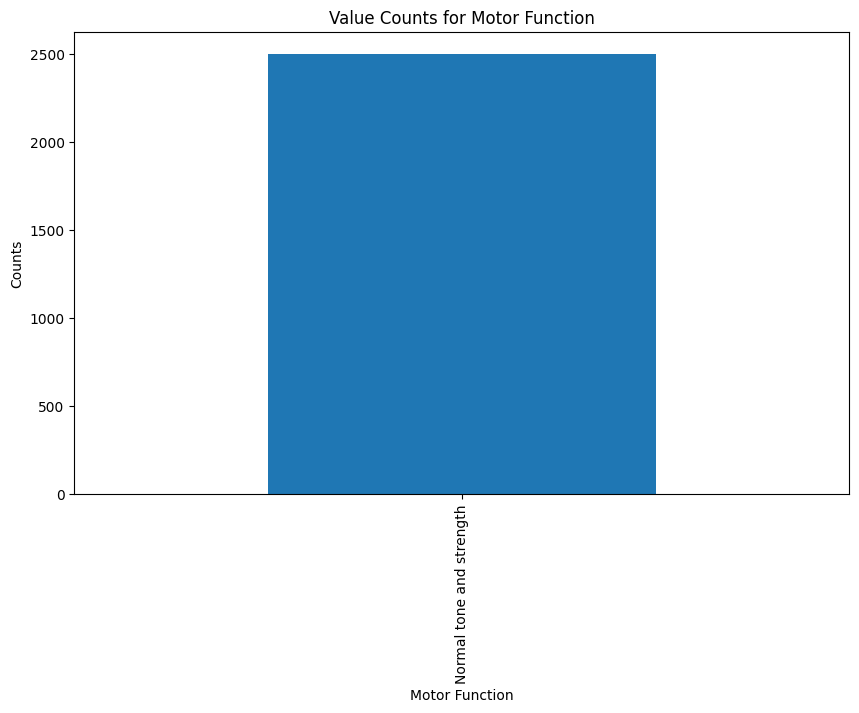

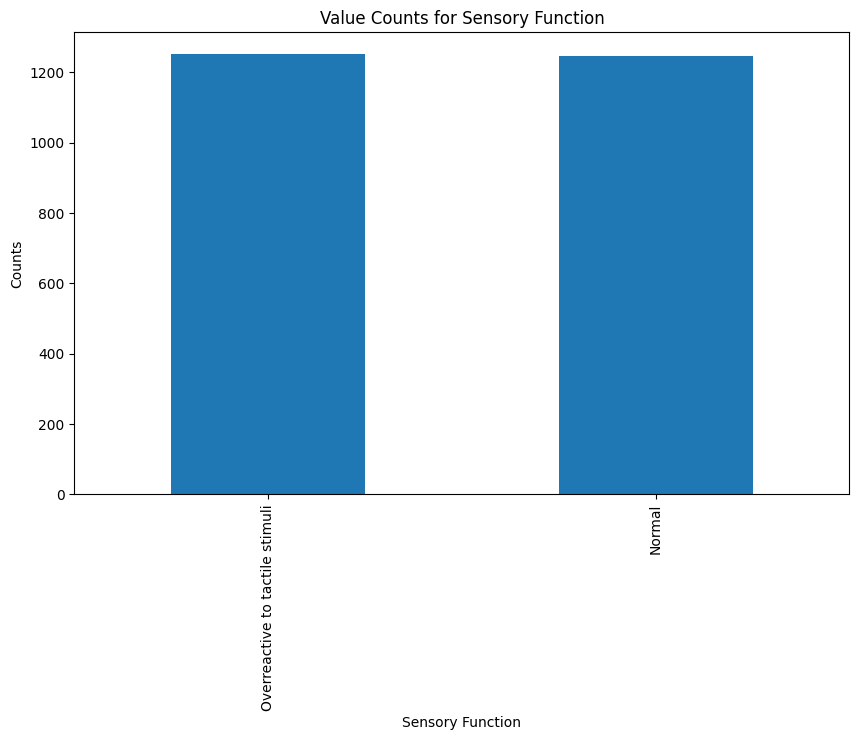

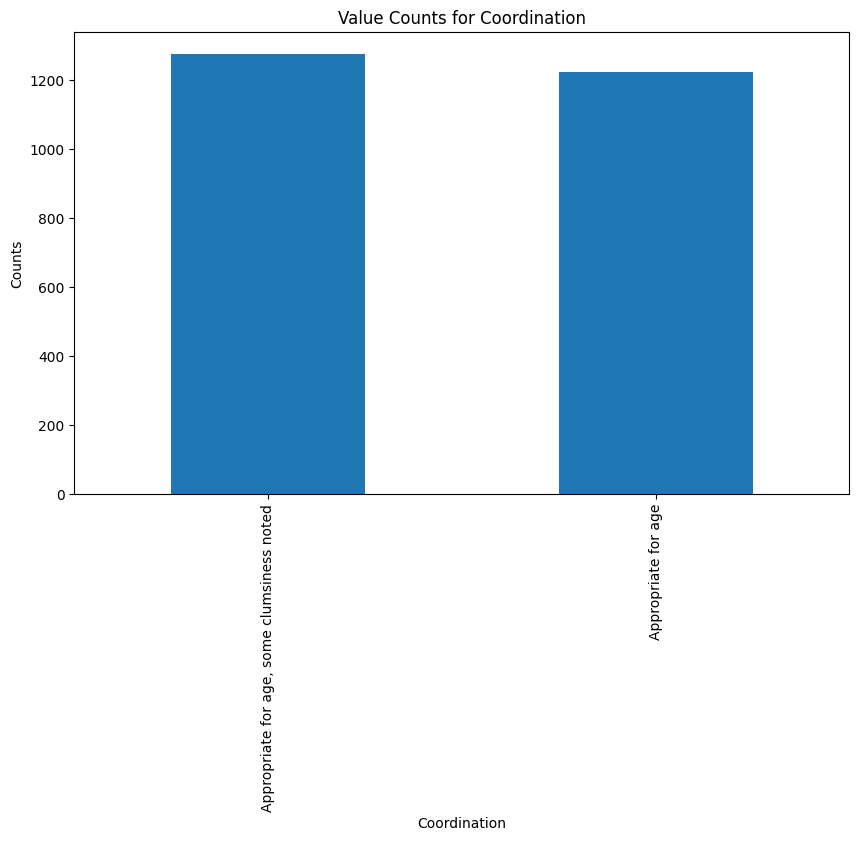

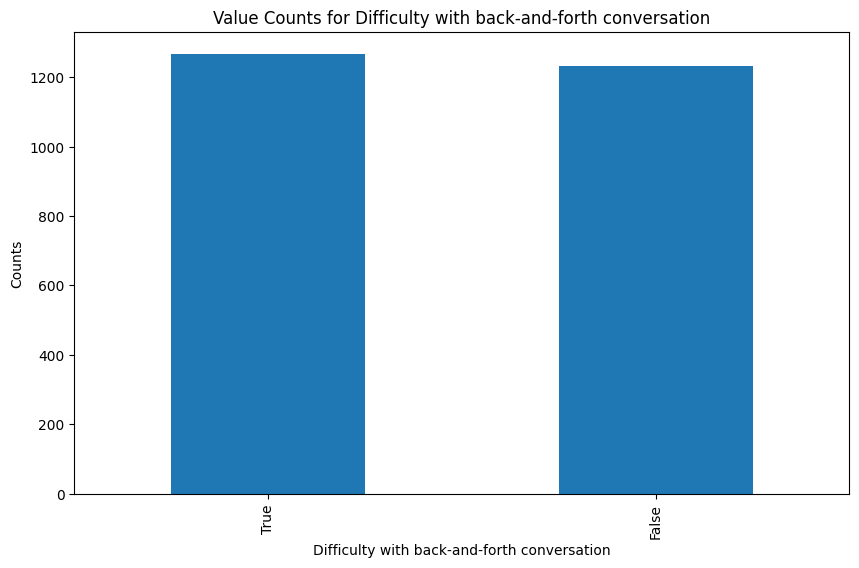

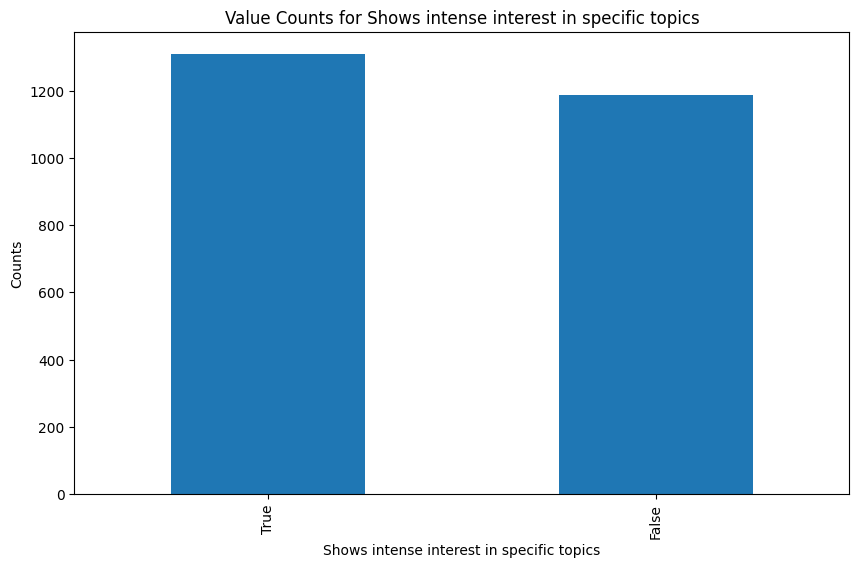

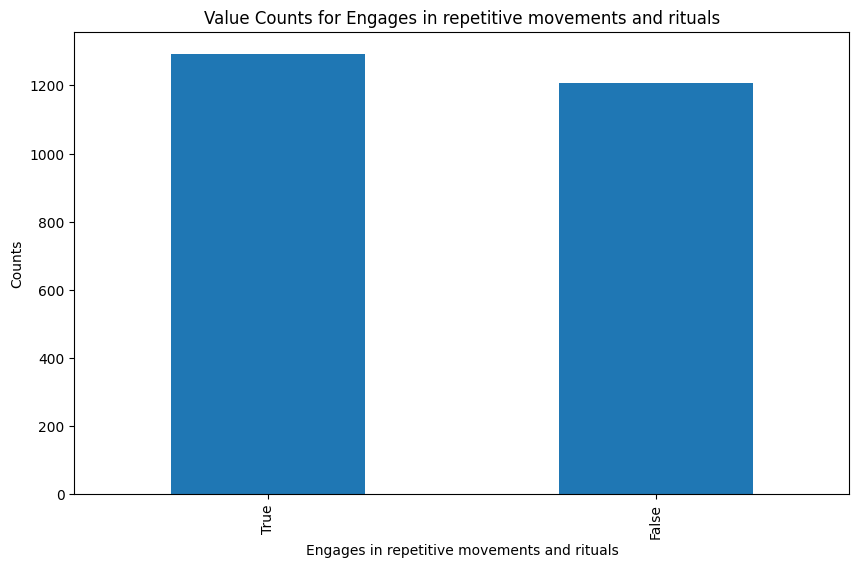

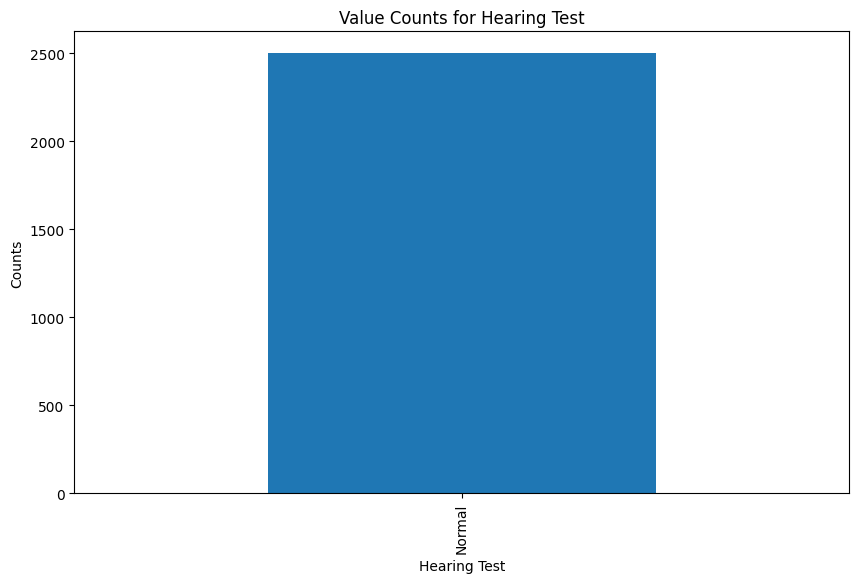

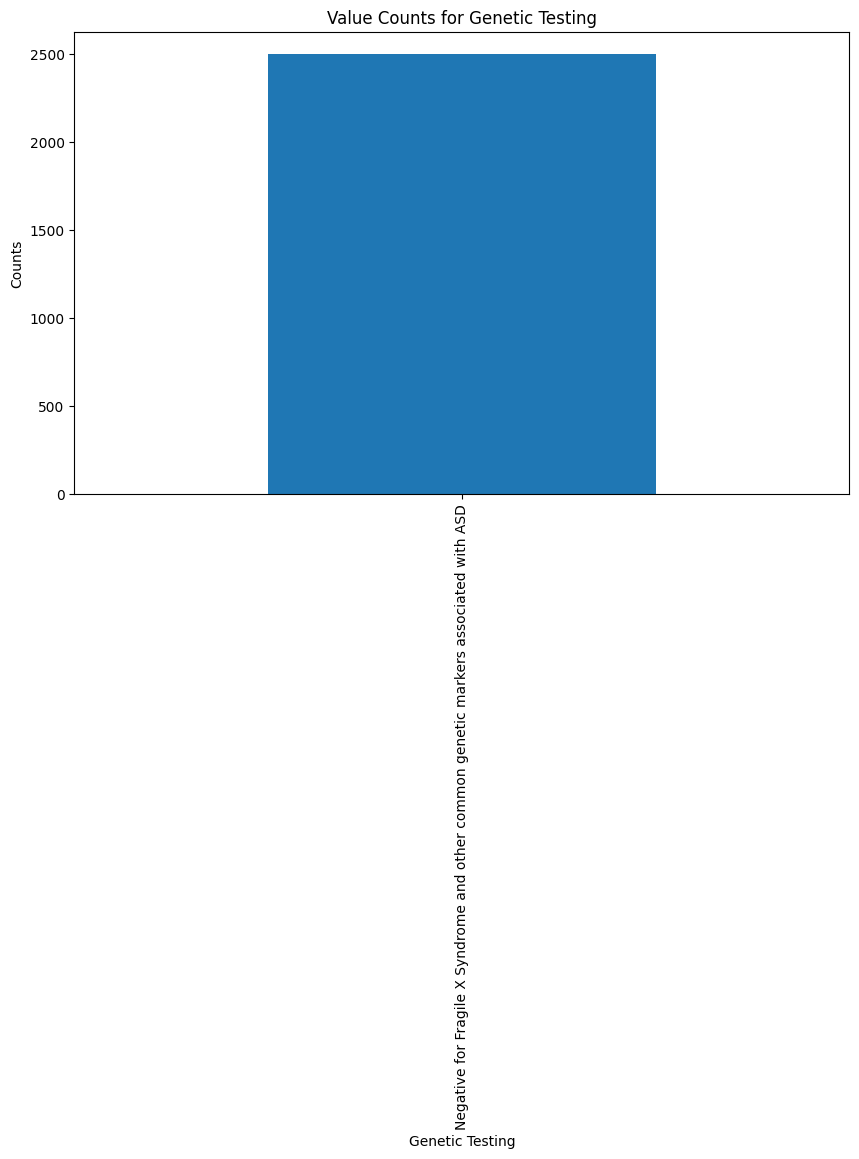

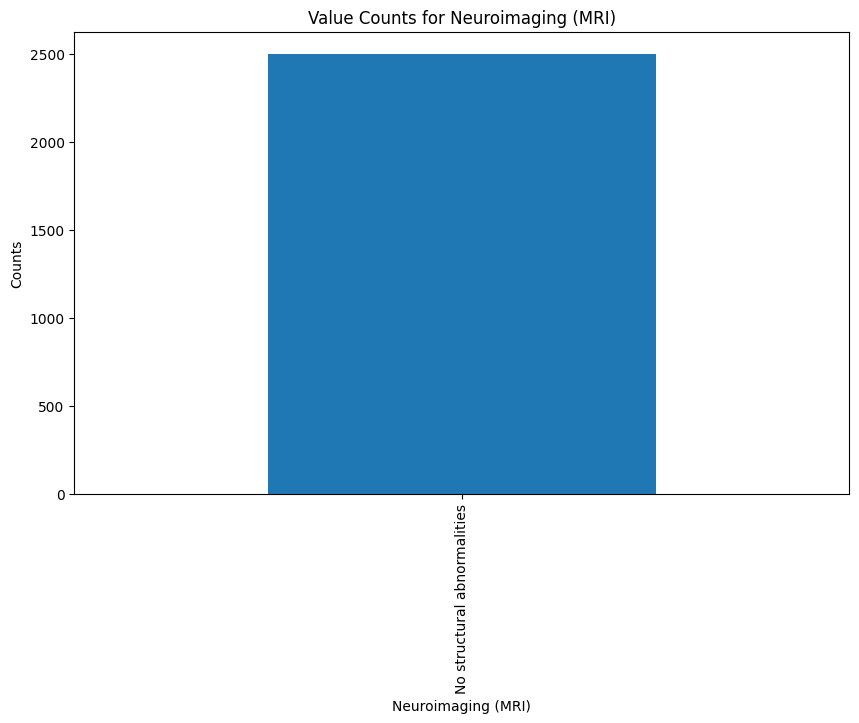

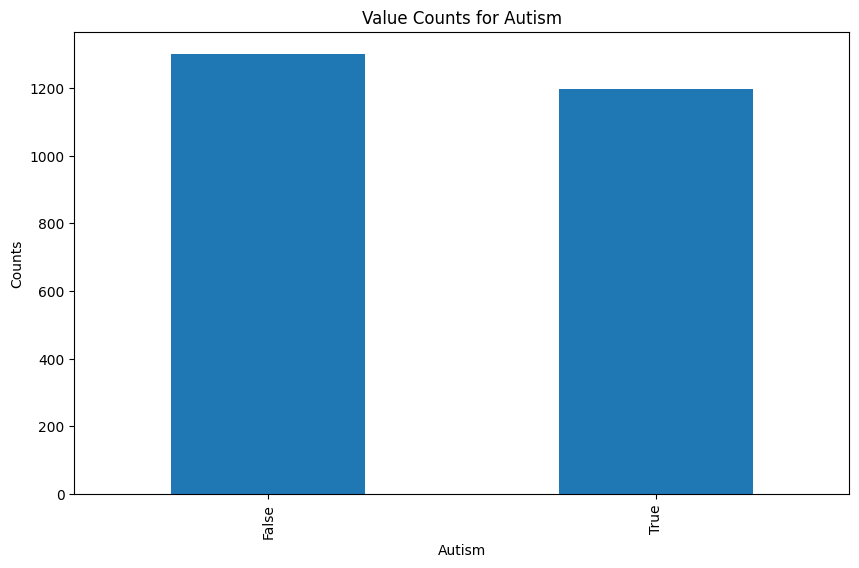

In [40]:
import matplotlib.pyplot as plt

# Loop through each column
for column in df.columns:
    # Plot value counts for the current column
    plt.figure(figsize=(10, 6))
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Value Counts for {column}')
    plt.xlabel(column)
    plt.ylabel('Counts')
    plt.show()


In [41]:
strings_cols = []
numeric_cols = []
for i in df.columns:
  if(df[i].dtype == 'O' or df[i].dtype == 'bool'):
    strings_cols.append(i)
  else:
    numeric_cols.append(i)

In [42]:
strings_cols.pop()
strings_cols

['Gender',
 'Delayed speech and language development',
 'Difficulty in social interactions',
 'Repetitive behaviors and routines',
 'Sensitivity to sensory stimuli',
 'Birth History',
 'Complications during pregnancy or delivery',
 'Limited vocabulary and echolalia observed',
 'Frequent ear infections treated with antibiotics',
 'Significant illnesses or hospitalizations',
 'Family history of autism or related disorders',
 'Other neurological or psychiatric disorders',
 'Lives with parents and siblings',
 'Attends special education program',
 'Limited peer interactions and prefers solitary activities',
 'Alert, cooperative but avoids eye contact',
 'Engages in repetitive hand-flapping when excited',
 'Cranial Nerves',
 'Motor Function',
 'Sensory Function',
 'Coordination',
 'Difficulty with back-and-forth conversation',
 'Shows intense interest in specific topics',
 'Engages in repetitive movements and rituals',
 'Hearing Test',
 'Genetic Testing',
 'Neuroimaging (MRI)']

In [43]:
# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform only the numerical columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [44]:
df

,Age,Gender,Delayed speech and language development,Difficulty in social interactions,Repetitive behaviors and routines,Sensitivity to sensory stimuli,Birth History,Birth weight (kg),Complications during pregnancy or delivery,Rolled over at (months),...,Motor Function,Sensory Function,Coordination,Difficulty with back-and-forth conversation,Shows intense interest in specific topics,Engages in repetitive movements and rituals,Hearing Test,Genetic Testing,Neuroimaging (MRI),Autism
0,0.285714,Male,False,True,False,True,"Full-term, cesarean delivery",0.30,Yes,0.000000,...,Normal tone and strength,Overreactive to tactile stimuli,Appropriate for age,True,False,True,Normal,Negative for Fragile X Syndrome and other comm...,No structural abnormalities,True
1,0.714286,Female,False,True,True,True,"Full-term, cesarean delivery",0.10,No,0.333333,...,Normal tone and strength,Overreactive to tactile stimuli,"Appropriate for age, some clumsiness noted",True,True,False,Normal,Negative for Fragile X Syndrome and other comm...,No structural abnormalities,True
2,0.857143,Female,False,True,False,False,"Full-term, cesarean delivery",0.45,Yes,0.666667,...,Normal tone and strength,Normal,Appropriate for age,False,False,True,Normal,Negative for Fragile X Syndrome and other comm...,No structural abnormalities,True
3,0.714286,Female,True,False,True,True,"Preterm, normal vaginal delivery",0.55,Yes,1.000000,...,Normal tone and strength,Normal,"Appropriate for age, some clumsiness noted",False,True,False,Normal,Negative for Fragile X Syndrome and other comm...,No structural abnormalities,False
4,0.285714,Male,True,False,False,True,"Full-term, cesarean delivery",0.05,Yes,0.000000,...,Normal tone and strength,Normal,Appropriate for age,True,False,True,Normal,Negative for Fragile X Syndrome and other comm...,No structural abnormalities,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.000000,Male,False,True,True,False,"Preterm, normal vaginal delivery",0.90,Yes,1.000000,...,Normal tone and strength,Overreactive to tactile stimuli,"Appropriate for age, some clumsiness noted",False,False,True,Normal,Negative for Fragile X Syndrome and other comm...,No structural abnormalities,True
2496,1.000000,Male,True,False,False,True,"Full-term, normal vaginal delivery",0.15,No,0.000000,...,Normal tone and strength,Normal,"Appropriate for age, some clumsiness noted",True,True,False,Normal,Negative for Fragile X Syndrome and other comm...,No structural abnormalities,False
2497,0.142857,Male,False,True,False,True,"Full-term, cesarean delivery",0.70,Yes,0.333333,...,Normal tone and strength,Overreactive to tactile stimuli,"Appropriate for age, some clumsiness noted",True,False,False,Normal,Negative for Fragile X Syndrome and other comm...,No structural abnormalities,False
2498,0.142857,Female,False,False,False,True,"Full-term, normal vaginal delivery",0.05,No,0.666667,...,Normal tone and strength,Overreactive to tactile stimuli,"Appropriate for age, some clumsiness noted",True,False,True,Normal,Negative for Fragile X Syndrome and other comm...,No structural abnormalities,False


In [45]:
boolean_cols = df.select_dtypes(include=['bool']).columns
df[boolean_cols] = df[boolean_cols].astype(int)

In [46]:
nlp = spacy.load("en_core_web_md")

# Define function to calculate semantic similarity
def calculate_similarity(text, desc_doc):
    text_doc = nlp(text)
    return text_doc.similarity(desc_doc)

In [47]:
# Dictionary to hold column descriptions (only for the selected columns)
column_descriptions = {
    'Age': 'age of the individual',
    'Gender': 'gender of the individual',
    'Delayed speech and language development': 'delayed speech and language development',
    'Difficulty in social interactions': 'difficulty interacting socially',
    'Repetitive behaviors and routines': 'repetitive behaviors and routines',
    'Sensitivity to sensory stimuli': 'sensitivity to sensory stimuli',
    'Birth History': 'details of birth history',
    'Birth weight (kg)': 'birth weight in kilograms',
    'Complications during pregnancy or delivery': 'complications during pregnancy or delivery',
    'Rolled over at (months)': 'age in months when first rolled over',
    'Sat without support at (months)': 'age in months when first sat without support',
    'Walked independently at (months)': 'age in months when first walked independently',
    'First words at (months)': 'age in months when first spoke words',
    'Limited vocabulary and echolalia observed': 'limited vocabulary and echolalia observed',
    'Frequent ear infections treated with antibiotics': 'frequent ear infections treated with antibiotics',
    'Significant illnesses or hospitalizations': 'significant illnesses or hospitalizations',
    'Family history of autism or related disorders': 'family history of autism or related disorders',
    'Other neurological or psychiatric disorders': 'other neurological or psychiatric disorders',
    'Lives with parents and siblings': 'living situation with parents and siblings',
    'Attends special education program': 'attends special education program',
    'Limited peer interactions and prefers solitary activities': 'limited peer interactions and prefers solitary activities',
    'Alert, cooperative but avoids eye contact': 'alert, cooperative but avoids eye contact',
    'Engages in repetitive hand-flapping when excited': 'engages in repetitive hand-flapping when excited',
    'Cranial Nerves': 'condition of cranial nerves',
    'Motor Function': 'motor function',
    'Sensory Function': 'sensory function',
    'Coordination': 'coordination',
    'Difficulty with back-and-forth conversation': 'difficulty with back-and-forth conversation',
    'Shows intense interest in specific topics': 'intense interest in specific topics',
    'Engages in repetitive movements and rituals': 'repetitive movements and rituals',
    'Hearing Test': 'results of hearing test',
    'Genetic Testing': 'results of genetic testing',
    'Neuroimaging (MRI)': 'results of neuroimaging (MRI)',
    'Autism': 'whether diagnosed with autism'
}

In [48]:
# Process column descriptions
desc_docs = {col: nlp(desc) for col, desc in column_descriptions.items()}

In [49]:
# Function to replace column values with semantic similarity scores
def replace_column_with_similarity(df, column, desc_doc):
    if df[column].dtype == 'object':
        df[column] = df[column].apply(lambda x: calculate_similarity(str(x), desc_doc))
    else:
        print(f'Column "{column}" is not of type object and will not be processed.')

In [50]:
# Apply similarity computation to each column
for column, desc_doc in desc_docs.items():
    replace_column_with_similarity(df, column, desc_doc)

Column "Age" is not of type object and will not be processed.
Column "Delayed speech and language development" is not of type object and will not be processed.
Column "Difficulty in social interactions" is not of type object and will not be processed.
Column "Repetitive behaviors and routines" is not of type object and will not be processed.
Column "Sensitivity to sensory stimuli" is not of type object and will not be processed.
Column "Birth weight (kg)" is not of type object and will not be processed.
Column "Rolled over at (months)" is not of type object and will not be processed.
Column "Sat without support at (months)" is not of type object and will not be processed.
Column "Walked independently at (months)" is not of type object and will not be processed.
Column "First words at (months)" is not of type object and will not be processed.
Column "Limited vocabulary and echolalia observed" is not of type object and will not be processed.
Column "Attends special education program" is 

In [51]:
df

,Age,Gender,Delayed speech and language development,Difficulty in social interactions,Repetitive behaviors and routines,Sensitivity to sensory stimuli,Birth History,Birth weight (kg),Complications during pregnancy or delivery,Rolled over at (months),...,Motor Function,Sensory Function,Coordination,Difficulty with back-and-forth conversation,Shows intense interest in specific topics,Engages in repetitive movements and rituals,Hearing Test,Genetic Testing,Neuroimaging (MRI),Autism
0,0.285714,0.030475,0,1,0,1,0.453163,0.30,-0.043349,0.000000,...,0.578992,0.689833,0.377320,1,0,1,0.356739,0.763417,0.29954,1
1,0.714286,0.258916,0,1,1,1,0.453163,0.10,-0.036268,0.333333,...,0.578992,0.689833,0.515086,1,1,0,0.356739,0.763417,0.29954,1
2,0.857143,0.258916,0,1,0,0,0.453163,0.45,-0.043349,0.666667,...,0.578992,0.406903,0.377320,0,0,1,0.356739,0.763417,0.29954,1
3,0.714286,0.258916,1,0,1,1,0.475259,0.55,-0.043349,1.000000,...,0.578992,0.406903,0.515086,0,1,0,0.356739,0.763417,0.29954,0
4,0.285714,0.030475,1,0,0,1,0.453163,0.05,-0.043349,0.000000,...,0.578992,0.406903,0.377320,1,0,1,0.356739,0.763417,0.29954,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.000000,0.030475,0,1,1,0,0.475259,0.90,-0.043349,1.000000,...,0.578992,0.689833,0.515086,0,0,1,0.356739,0.763417,0.29954,1
2496,1.000000,0.030475,1,0,0,1,0.445812,0.15,-0.036268,0.000000,...,0.578992,0.406903,0.515086,1,1,0,0.356739,0.763417,0.29954,0
2497,0.142857,0.030475,0,1,0,1,0.453163,0.70,-0.043349,0.333333,...,0.578992,0.689833,0.515086,1,0,0,0.356739,0.763417,0.29954,0
2498,0.142857,0.258916,0,0,0,1,0.445812,0.05,-0.036268,0.666667,...,0.578992,0.689833,0.515086,1,0,1,0.356739,0.763417,0.29954,0


In [52]:
# Selecting relevant columns for causal discovery
relevant_columns = [
    'Age', 'Gender', 'Delayed speech and language development',
    'Difficulty in social interactions', 'Repetitive behaviors and routines',
    'Sensitivity to sensory stimuli', 'Birth weight (kg)',
    'Complications during pregnancy or delivery', 'Rolled over at (months)',
    'Sat without support at (months)', 'Walked independently at (months)',
    'First words at (months)', 'Limited vocabulary and echolalia observed',
    'Frequent ear infections treated with antibiotics',
    'Significant illnesses or hospitalizations',
    'Family history of autism or related disorders',
    'Other neurological or psychiatric disorders', 'Attends special education program',
    'Limited peer interactions and prefers solitary activities',
    'Alert, cooperative but avoids eye contact',
    'Engages in repetitive hand-flapping when excited'
]

In [53]:
processed_data = df[relevant_columns]

In [54]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(processed_data)

In [55]:
def is_independent(X, Y, Z=None, alpha=0.05):
    if Z is None:
        corr, _ = pearsonr(X, Y)
    else:
        # Implement partial correlation test for conditional independence
        X_res = X - np.dot(np.linalg.pinv(Z), X)
        Y_res = Y - np.dot(np.linalg.pinv(Z), Y)
        corr, _ = pearsonr(X_res, Y_res)
    return np.abs(corr) < alpha

In [56]:
# Initialize empty graph structure
num_vars = data_scaled.shape[1]
graph = np.zeros((num_vars, num_vars))

# Find conditional independencies and construct the skeleton
for i in range(num_vars):
    for j in range(i+1, num_vars):
        independent = True
        for k in range(num_vars):
            if k != i and k != j:
                if not is_independent(data_scaled[:, i], data_scaled[:, j], data_scaled[:, [k]]):
                    independent = False
                    break
        if not independent:
            graph[i, j] = graph[j, i] = 1

print("Causal Graph Adjacency Matrix:")
print(graph)

Causal Graph Adjacency Matrix:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [57]:
def is_v_structure(graph, i, j, k):
    # Check if i -> k <- j and i -- j is not in the graph
    return (graph[i, k] == 1 and graph[j, k] == 1 and graph[i, j] == 0)

def orient_edges(skeleton):
    num_vars = skeleton.shape[0]
    graph = np.copy(skeleton)

    # Step 1: Identify V-structures
    for i in range(num_vars):
        for j in range(num_vars):
            for k in range(num_vars):
                if i != j and j != k and i != k:
                    if is_v_structure(graph, i, j, k):
                        graph[i, k] = 1  # Orient i -> k
                        graph[j, k] = 1  # Orient j -> k
                        graph[k, i] = 0  # Remove k -> i if exists
                        graph[k, j] = 0  # Remove k -> j if exists

    # Step 2: Apply Meek Rules
    for i in range(num_vars):
        for j in range(num_vars):
            if graph[i, j] == 1 and graph[j, i] == 0:  # i -> j
                for k in range(num_vars):
                    if k != i and k != j:
                        # Rule 1: i -> j and j - k and not (i - k) => j -> k
                        if graph[j, k] == 1 and graph[k, j] == 1 and graph[i, k] == 0:
                            graph[j, k] = 1
                            graph[k, j] = 0
                        # Rule 2: i -> j and i -> k and not (j - k) => i -> k
                        if graph[i, k] == 1 and graph[k, i] == 0 and graph[j, k] == 0 and graph[k, j] == 0:
                            graph[j, k] = 1
                            graph[k, j] = 0


    return graph


In [58]:
causal_graph = orient_edges(graph)

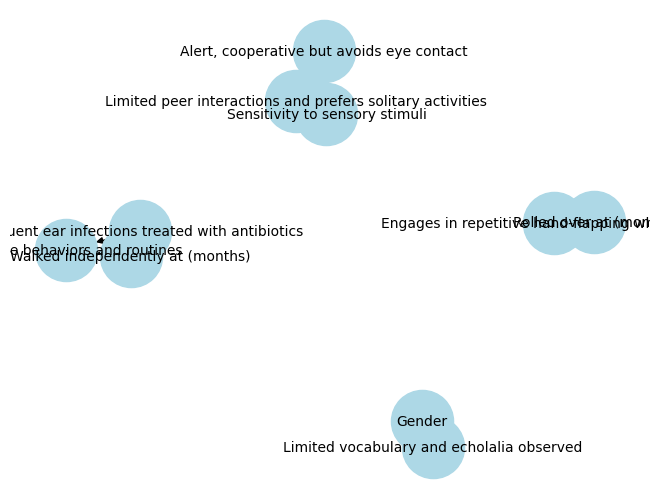

In [59]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_causal_graph(graph, labels):
    G = nx.DiGraph()
    for i in range(len(graph)):
        for j in range(len(graph)):
            if graph[i, j] == 1:
                G.add_edge(labels[i], labels[j])

    nx.draw(G, with_labels=True, node_size=2000, font_size=10, font_color='black', node_color='lightblue')
    plt.show()

labels = relevant_columns
plot_causal_graph(causal_graph, labels)

In [60]:
import numpy as np
import torch
from torch_geometric.data import Data

# 1. Extract Node Features
node_features = processed_data.iloc[:, :-1].to_numpy(dtype=np.float32)  # All columns except the last one
node_features = torch.tensor(node_features, dtype=torch.float)

# 2. Extract the Target Variable (assuming it's the last column)
target = processed_data.iloc[:, -1].to_numpy(dtype=np.float32)  # Last column as the target
target = torch.tensor(target, dtype=torch.float)


# 3. Extract Edge Index and Features from Causal Graph
num_nodes = causal_graph.shape[0]
edge_index = []
edge_attr = []

# Iterate over the adjacency matrix to extract edges and their attributes
for i in range(num_nodes):
    for j in range(num_nodes):
        if causal_graph[i, j] != 0:
            edge_index.append([i, j])
            edge_attr.append(causal_graph[i, j])

edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
edge_attr = torch.tensor(edge_attr, dtype=torch.float)

data = Data(x=node_features, edge_index=edge_index, edge_attr=edge_attr)

print(data)

Data(x=[2500, 20], edge_index=[2, 8], edge_attr=[8])


In [61]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data


In [62]:
# Define a simple GCN model
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(node_features.size(1), 30)
        self.conv2 = GCNConv(30, 50)
        self.conv3 = GCNConv(50, 80)
        self.conv4 = GCNConv(80, 100)
        self.conv5 = GCNConv(100, 80)
        self.conv6 = GCNConv(80, 50)
        self.conv7 = GCNConv(50, 30)
        self.conv8 = GCNConv(30, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = F.relu(x)
        x = self.conv4(x, edge_index)
        x = F.relu(x)
        x = self.conv5(x, edge_index)
        x = F.relu(x)
        x = self.conv6(x, edge_index)
        x = F.relu(x)
        x = self.conv7(x, edge_index)
        x = F.relu(x)
        x = self.conv8(x, edge_index)
        return F.sigmoid(x)

In [63]:
target = target.view(-1, 1)
target

tensor([[1.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])

In [65]:
# Initialize the model and optimizer
model = GCN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
model.train()
for epoch in range(1050):
    optimizer.zero_grad()
    out = model(data)
    # Define your loss function (e.g., binary cross-entropy for binary outcomes)
    loss = F.binary_cross_entropy(out, target)
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

Epoch 1, Loss: 0.6934875249862671
Epoch 2, Loss: 0.6955318450927734
Epoch 3, Loss: 0.706472635269165
Epoch 4, Loss: 0.6933282017707825
Epoch 5, Loss: 0.6933739185333252
Epoch 6, Loss: 0.6934338212013245
Epoch 7, Loss: 0.6932435631752014
Epoch 8, Loss: 0.6931110620498657
Epoch 9, Loss: 0.6930837035179138
Epoch 10, Loss: 0.6930469870567322
Epoch 11, Loss: 0.6928952932357788
Epoch 12, Loss: 0.6927469968795776
Epoch 13, Loss: 0.6925506591796875
Epoch 14, Loss: 0.6921320557594299
Epoch 15, Loss: 0.6913371682167053
Epoch 16, Loss: 0.6902345418930054
Epoch 17, Loss: 0.688696563243866
Epoch 18, Loss: 0.6866565346717834
Epoch 19, Loss: 0.6840363144874573
Epoch 20, Loss: 0.681742250919342
Epoch 21, Loss: 0.6998910307884216
Epoch 22, Loss: 0.6790825724601746
Epoch 23, Loss: 0.6863040328025818
Epoch 24, Loss: 0.6762488484382629
Epoch 25, Loss: 0.680851936340332
Epoch 26, Loss: 0.6787667870521545
Epoch 27, Loss: 0.673151433467865
Epoch 28, Loss: 0.6752355694770813
Epoch 29, Loss: 0.6711867451667786

In [66]:
def intervention(node_index, new_value, data, model):
    data[node_index] = new_value
    model.eval()
    with torch.no_grad():
        new_output = model(data)
    return new_output

# Calculate the effect of changing a specific feature
original_output = model(data)
intervention_output = intervention(node_index=0, new_value=torch.tensor([1.0]), data=data, model=model)

causal_effect = intervention_output - original_output
print(f'Causal Effect: {causal_effect}')

Causal Effect: tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]], grad_fn=<SubBackward0>)
